Here goes my first hypothesis!

In [1]:
#Imports:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [3]:
#Uploading tmy "clean" data:
attack4 = pd.read_csv('Input/attack4.csv',encoding = 'latin-1')
display(attack4)

,Country,Area,realDate,realYear,Activity,Injury,Fatal (Y/N),Species,Sex,Type,Unnamed: 10
0,ADMIRALTY ISLANDS,Manus Island,15-Oct-1962,1962,NaN,lacerations,N,NaN,M,Unprovoked,NaN
1,AFRICA,NaN,30-Sep-1846,1846,Jumped into river,FATAL,Y,NaN,M,Unprovoked,NaN
2,AMERICAN SAMOA,Tutuila Island,12-Dec-1958,1958,Cleaning hull of ship,thigh,Y,Tiger shark,M,Unprovoked,NaN
3,AMERICAN SAMOA,Tutuila Island,08-Aug-1955,1955,Swimming,FATAL,Y,Blue shark,M,Unprovoked,NaN
4,AMERICAN SAMOA,Tutuila Island,29-Dec-1954,1954,Dived overboard & was swimming near stern of t...,FATAL,Y,NaN,M,Unprovoked,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5315,YEMEN,Aden,29-Jun-1901,1901,Diving around anchored liner,NaN,NaN,Questionable,M,Invalid,NaN
5316,YEMEN,Aden,15-Jul-1898,1898,Swimming at side of small boat,leg,Y,NaN,M,Unprovoked,NaN
5317,YEMEN,Aden,14-Jul-1898,1898,Standing,FATAL,Y,NaN,M,Unprovoked,NaN
5318,YEMEN,Socotra Islands,09-Jun-1897,1897,Wreck of the steamship Sultan of Bombay,FATAL,Y,NaN,NaN,Sea Disaster,NaN


In [15]:
attack4 = attack4.drop(columns = ['Unnamed: 10'])

,Country,Area,realDate,realYear,Activity,Injury,Fatal (Y/N),Species,Sex,Type
0,ADMIRALTY ISLANDS,Manus Island,15-Oct-1962,1962,NaN,lacerations,N,NaN,M,Unprovoked
1,AFRICA,NaN,30-Sep-1846,1846,Jumped into river,FATAL,Y,NaN,M,Unprovoked
2,AMERICAN SAMOA,Tutuila Island,12-Dec-1958,1958,Cleaning hull of ship,thigh,Y,Tiger shark,M,Unprovoked
3,AMERICAN SAMOA,Tutuila Island,08-Aug-1955,1955,Swimming,FATAL,Y,Blue shark,M,Unprovoked
4,AMERICAN SAMOA,Tutuila Island,29-Dec-1954,1954,Dived overboard & was swimming near stern of t...,FATAL,Y,NaN,M,Unprovoked
...,...,...,...,...,...,...,...,...,...,...
5315,YEMEN,Aden,29-Jun-1901,1901,Diving around anchored liner,NaN,NaN,Questionable,M,Invalid
5316,YEMEN,Aden,15-Jul-1898,1898,Swimming at side of small boat,leg,Y,NaN,M,Unprovoked
5317,YEMEN,Aden,14-Jul-1898,1898,Standing,FATAL,Y,NaN,M,Unprovoked
5318,YEMEN,Socotra Islands,09-Jun-1897,1897,Wreck of the steamship Sultan of Bombay,FATAL,Y,NaN,NaN,Sea Disaster


In [35]:
attackUSA= attack4.loc[attack4['Country'] == ('USA')]
attackAUS= attack4.loc[attack4['Country'] == ('AUSTRALIA')]



In [36]:
attackUSA = attackUSA.reset_index(drop=True)
display(attackUSA)

,Country,Area,realDate,realYear,Activity,Injury,Fatal (Y/N),Species,Sex,Type
0,USA,California,25-Jun-2018,2018,Paddling,NO INJURY,N,White shark,F,Boating
1,USA,Georgia,18-Jun-2018,2018,Standing,thigh,N,NaN,F,Unprovoked
2,USA,Hawaii,09-Jun-2018,2018,Surfing,leg,N,NaN,M,Invalid
3,USA,Florida,27-May-2018,2018,Fishing,foot,N,"Lemon shark, 3'",M,Unprovoked
4,USA,Florida,26-May-2018,2018,Walking,leg,N,"Bull shark, 6'",M,Unprovoked
...,...,...,...,...,...,...,...,...,...,...
2030,USA,Florida,08-Aug-1780,1780,Swimming,FATAL,Y,NaN,M,Unprovoked
2031,USA,NaN,12-Jul-1771,1771,Fishing,FATAL,Y,NaN,M,Unprovoked
2032,USA,Massachusetts,27-Jul-1751,1751,Swimming,FATAL,Y,NaN,M,Unprovoked
2033,USA,California,19-Jun-1959,1959,NaN,leg,N,"White shark, 1,900-lb",F,Unprovoked


In [37]:
attackAUS = attackAUS.reset_index(drop=True)
display(attackAUS)

,Country,Area,realDate,realYear,Activity,Injury,Fatal (Y/N),Species,Sex,Type
0,AUSTRALIA,New South Wales,08-Jun-2018,2018,Surfing,leg,N,2 m shark,M,Unprovoked
1,AUSTRALIA,New South Wales,03-Jun-2018,2018,Kite surfing,NO INJURY,N,NaN,M,Unprovoked
2,AUSTRALIA,Queensland,24-May-2018,2018,Feeding sharks,hand,N,Grey reef shark,M,Provoked
3,AUSTRALIA,New South Wales,09-May-2018,2018,Surfing,NO INJURY,N,Shark involvement not confirmed,M,Questionable
4,AUSTRALIA,Western Australia,28-Apr-2018,2018,Surfing,NO INJURY,N,NaN,M,Unprovoked
...,...,...,...,...,...,...,...,...,...,...
1216,AUSTRALIA,New South Wales,04-Jun-1832,1832,Fishing,leg,N,NaN,F,Unprovoked
1217,AUSTRALIA,New South Wales,23-Jan-1832,1832,Bathing,leg,N,NaN,M,Unprovoked
1218,AUSTRALIA,New South Wales,12-Jan-1807,1807,NaN,Survived,N,NaN,M,Unprovoked
1219,AUSTRALIA,New South Wales,26-Feb-1804,1804,NaN,NO INJURY,N,NaN,NaN,Boat


In [38]:
attackUSAL= attackUSA.loc[attackUSA['Injury'] == ('leg')]
attackAUSL= attackAUS.loc[attackAUS['Injury'] == ('leg')]


In [39]:
attackUSAL = attackUSAL.reset_index(drop=True)
display(attackUSAL)

,Country,Area,realDate,realYear,Activity,Injury,Fatal (Y/N),Species,Sex,Type
0,USA,Hawaii,09-Jun-2018,2018,Surfing,leg,N,NaN,M,Invalid
1,USA,Florida,26-May-2018,2018,Walking,leg,N,"Bull shark, 6'",M,Unprovoked
2,USA,South Carolina,21-May-2018,2018,Boogie boarding,leg,N,NaN,M,Unprovoked
3,USA,Hawaii,19-Apr-2018,2018,Body boarding,leg,N,6' shark,M,Unprovoked
4,USA,Hawaii,31-Mar-2018,2018,Stand-Up Paddleboarding,leg,N,"Tiger shark, 12'",M,Unprovoked
...,...,...,...,...,...,...,...,...,...,...
434,USA,Maryland,31-Aug-1848,1848,Swimming,leg,N,NaN,M,Unprovoked
435,USA,New Jersey,13-Jul-1842,1842,Swimming,leg,N,NaN,M,Unprovoked
436,USA,New Jersey,06-Jul-1842,1842,Harassing a shark,leg,N,NaN,NaN,Provoked
437,USA,California,19-Jun-1959,1959,NaN,leg,N,"White shark, 1,900-lb",F,Unprovoked


In [40]:
attackAUSL = attackAUSL.reset_index(drop=True)
display(attackAUSL)

,Country,Area,realDate,realYear,Activity,Injury,Fatal (Y/N),Species,Sex,Type
0,AUSTRALIA,New South Wales,08-Jun-2018,2018,Surfing,leg,N,2 m shark,M,Unprovoked
1,AUSTRALIA,Western Australia,24-Apr-2018,2018,Surfing,leg,N,"White shark, 3.5 m",M,Unprovoked
2,AUSTRALIA,Western Australia,15-Apr-2018,2018,Surfing,leg,N,NaN,M,Unprovoked
3,AUSTRALIA,Western Australia,14-Mar-2018,2018,Wading,leg,N,Wobbegong shark,M,Unprovoked
4,AUSTRALIA,New South Wales,23-Feb-2018,2018,Swimming,leg,N,"Juvenile white shark, 2.7 to 3.2 m",F,Unprovoked
...,...,...,...,...,...,...,...,...,...,...
237,AUSTRALIA,Queensland,26-May-1870,1870,Fishing,leg,N,NaN,M,Unprovoked
238,AUSTRALIA,New South Wales,26-Dec-1860,1860,Bathing,leg,N,NaN,M,Unprovoked
239,AUSTRALIA,New South Wales,08-Nov-1853,1853,Swimming,leg,N,NaN,M,Unprovoked
240,AUSTRALIA,New South Wales,04-Jun-1832,1832,Fishing,leg,N,NaN,F,Unprovoked


In [72]:
USA_legs_per_year = attackUSAL['realYear'].value_counts()
AUS_legs_per_year = attackAUSL['realYear'].value_counts()
display(USA_legs_per_year)
display(AUS_legs_per_year)

2015    23
2002    14
2012    14
2007    14
2000    14
        ..
1965     1
1937     1
1938     1
1939     1
1955     1
Name: realYear, Length: 101, dtype: int64

2010    8
1934    7
2007    7
2018    7
2016    7
       ..
1925    1
1969    1
1971    1
1973    1
1979    1
Name: realYear, Length: 101, dtype: int64

In [75]:
attackUSAL.groupby('realYear').Injury.count()

realYear
1842     2
1848     1
1873     1
1876     1
1878     1
        ..
2014    12
2015    23
2016    10
2017    12
2018     5
Name: Injury, Length: 101, dtype: int64

In [76]:
attackAUS.groupby('realYear').Injury.count()

realYear
1788     1
1804     1
1807     1
1832     2
1837     1
        ..
2014    29
2015    31
2016    32
2017    23
2018    20
Name: Injury, Length: 171, dtype: int64

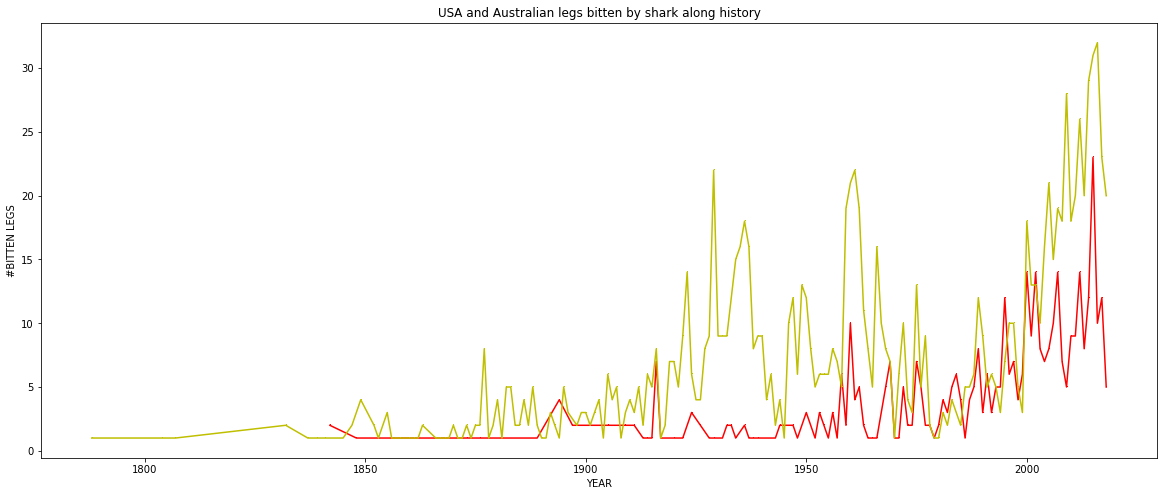

In [84]:
plt.figure(figsize=(20,8))
plt.title('USA and Australian legs bitten by shark along history')
plt.xlabel('YEAR')
plt.ylabel('#BITTEN LEGS')
plt.plot(attackUSAL.groupby('realYear').Injury.count(), 'r,-')
plt.plot(attackAUS.groupby('realYear').Injury.count(), 'y,-')
plt.show()